**UCS2612 Machine Learning Laboratory**


**Assignment 7: DECISION-TREE**


**Name: B Ayshwarya**


**Reg. No.: 3122 21 5001 017**




In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [6]:
data=pd.read_csv("/content/diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
data.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
#Find number of rows and columns

num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)



Number of rows: 100000
Number of columns: 9


In [10]:
#Distribution
data['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

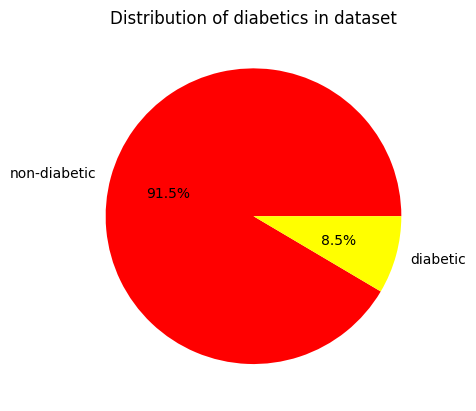

In [11]:
plt.pie(data['diabetes'].value_counts(), colors=['red','yellow'], labels = ['non-diabetic', 'diabetic'], autopct = '%1.1f%%')
#autopct='%1.1f%%' formats the numeric values displayed on the pie chart to show one decimal place followed by a percentage sign. This means each segment of the pie chart will display the percentage of the whole.
plt.title("Distribution of diabetics in dataset")
plt.show()


In [12]:
missing_values=data.isnull().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
#Convert Categorical variables into binary and numeric
label_encoder = preprocessing.LabelEncoder()
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data.head()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [14]:
numeric_data = data.select_dtypes(include='number')
print(numeric_data)


       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                 

In [15]:
# Selecting the numerical columns (excluding binary columns for hypertension, heart_disease, diabetes)
numerical_columns = ['age', 'bmi', 'HbA1c_level','smoking_history', 'blood_glucose_level']

In [16]:
# Calculate Z-scores for numeric columns
z_scores = data[numerical_columns].apply(stats.zscore)

print(z_scores)

            age       bmi  HbA1c_level  smoking_history  blood_glucose_level
0      1.692704 -0.321056     1.001706         0.963327             0.047704
1      0.538006 -0.000116     1.001706        -1.153468            -1.426210
2     -0.616691 -0.000116     0.161108         0.963327             0.489878
3     -0.261399 -0.583232    -0.492690        -0.624269             0.416183
4      1.515058 -1.081970    -0.679490        -0.624269             0.416183
...         ...       ...          ...              ...                  ...
99995  1.692704 -0.000116     0.628107        -1.153468            -1.180558
99996 -1.771388 -1.499343     0.908306        -1.153468            -0.934905
99997  1.070944  0.076729     0.161108         0.434128             0.416183
99998 -0.794336  1.220361    -1.426688         0.963327            -0.934905
99999  0.671241 -0.736922     1.001706        -0.624269            -1.180558

[100000 rows x 5 columns]


In [17]:
# Define threshold for outlier detection (e.g., Z-Score > 3)
threshold = 3
# Find outliers
outliers = data[z_scores > threshold]
print(outliers)

       gender  age  hypertension  heart_disease  smoking_history  bmi  \
0         NaN  NaN           NaN            NaN              NaN  NaN   
1         NaN  NaN           NaN            NaN              NaN  NaN   
2         NaN  NaN           NaN            NaN              NaN  NaN   
3         NaN  NaN           NaN            NaN              NaN  NaN   
4         NaN  NaN           NaN            NaN              NaN  NaN   
...       ...  ...           ...            ...              ...  ...   
99995     NaN  NaN           NaN            NaN              NaN  NaN   
99996     NaN  NaN           NaN            NaN              NaN  NaN   
99997     NaN  NaN           NaN            NaN              NaN  NaN   
99998     NaN  NaN           NaN            NaN              NaN  NaN   
99999     NaN  NaN           NaN            NaN              NaN  NaN   

       HbA1c_level  blood_glucose_level  diabetes  
0              NaN                  NaN       NaN  
1              NaN 

In [18]:
outliers_count = (z_scores.abs() > threshold).sum()
tot_outliers = (z_scores.abs() > threshold).sum().sum()
print("Number of outliers:", outliers_count)
print("Total Number of outliers:", tot_outliers)

Number of outliers: age                       0
bmi                    1294
HbA1c_level            1315
smoking_history           0
blood_glucose_level    1403
dtype: int64
Total Number of outliers: 4012


In [19]:
# normalization
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows to verify the normalization
print(data.head())



   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.000000             0              1              0.8  0.177171   
1       0  0.674675             0              0              0.0  0.202031   
2       1  0.349349             0              0              0.8  0.202031   
3       0  0.449449             0              0              0.2  0.156863   
4       1  0.949950             1              1              0.2  0.118231   

   HbA1c_level  blood_glucose_level  diabetes  
0     0.563636             0.272727         0  
1     0.563636             0.000000         0  
2     0.400000             0.354545         0  
3     0.272727             0.340909         0  
4     0.236364             0.340909         0  


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Assuming 'numerical_columns' is a list of the numerical column names in your DataFrame
# Fit the scaler to the data and transform it
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows to verify the standardization
print(data.head())

   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.692704             0              1         0.963327 -0.321056   
1       0  0.538006             0              0        -1.153468 -0.000116   
2       1 -0.616691             0              0         0.963327 -0.000116   
3       0 -0.261399             0              0        -0.624269 -0.583232   
4       1  1.515058             1              1        -0.624269 -1.081970   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.001706             0.047704         0  
1     1.001706            -1.426210         0  
2     0.161108             0.489878         0  
3    -0.492690             0.416183         0  
4    -0.679490             0.416183         0  


In [21]:
X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [23]:
y_pred_test = model.predict(X_test)
y_pred_train= model.predict(X_train)


In [24]:
# Generate classification report for training data
report_train = classification_report(y_train, y_pred_train)
print("Classification Report - Training Data:\n", report_train)

# Generate classification report for testing data
report_test = classification_report(y_test, y_pred_test)
print("Classification Report - Testing Data:\n", report_test)


Classification Report - Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     64047
           1       1.00      0.99      1.00      5953

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Classification Report - Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     27453
           1       0.72      0.74      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.86      0.85     30000
weighted avg       0.95      0.95      0.95     30000



In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_test)

0.8557297648487744

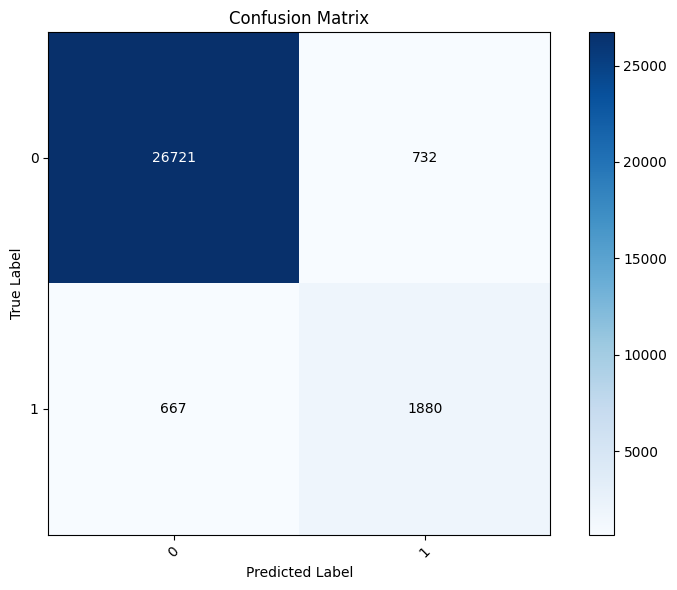

In [26]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(model.classes_))
plt.xticks(tick_marks, model.classes_, rotation=45)
plt.yticks(tick_marks, model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add counts in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



In [27]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training data:", accuracy_train)

# Calculate accuracy for testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on testing data:", accuracy_test)


Accuracy on training data: 0.9993142857142857
Accuracy on testing data: 0.9533666666666667


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'features' contains your feature matrix and 'labels' contains your target variable
# Example:
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create and train Decision Tree models with entropy and Gini index
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit models to training data
tree_entropy.fit(X_train, y_train)
tree_gini.fit(X_train, y_train)

# Predictions
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_gini = tree_gini.predict(X_test)

# Evaluate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print("Accuracy using entropy:", accuracy_entropy)
print("Accuracy using Gini index:", accuracy_gini)


Accuracy using entropy: 0.9542333333333334
Accuracy using Gini index: 0.9529333333333333
